In [1]:
import numpy as np 
import pandas as pd
## agg backend is used to create plot as a .png file
import matplotlib 
matplotlib.use('agg')

import matplotlib.pyplot as plt
%matplotlib inline

autos = pd.read_csv('C:\\Users\\Marci\\Desktop\\autos.csv',encoding = "ISO-8859-1")

In [2]:
print(autos.columns)

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')


In [3]:
!pip install seaborn
!pip install sklearn

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
import seaborn as sns

In [5]:
autos.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [6]:
print(autos.shape)
print('###########################################')
print(autos.describe())
#nrOf Pictures should be dropped, no particular information
print('###########################################')
autos = autos.drop('nrOfPictures',axis=1)   #it needs numpy to run

(371528, 20)
###########################################
              price  yearOfRegistration        powerPS      kilometer  \
count  3.715280e+05       371528.000000  371528.000000  371528.000000   
mean   1.729514e+04         2004.577997     115.549477  125618.688228   
std    3.587954e+06           92.866598     192.139578   40112.337051   
min    0.000000e+00         1000.000000       0.000000    5000.000000   
25%    1.150000e+03         1999.000000      70.000000  125000.000000   
50%    2.950000e+03         2003.000000     105.000000  150000.000000   
75%    7.200000e+03         2008.000000     150.000000  150000.000000   
max    2.147484e+09         9999.000000   20000.000000  150000.000000   

       monthOfRegistration  nrOfPictures    postalCode  
count        371528.000000      371528.0  371528.00000  
mean              5.734445           0.0   50820.66764  
std               3.712412           0.0   25799.08247  
min               0.000000           0.0    1067.00000  


In [7]:
print(autos.groupby('name').size())
#lots of special caracheters and expressions , that should be removed
#e.g: !!!, "top", caps lock descriptions,...

name
!!!!!!!!!!!!!!!!!!!!!!!!__GOLF_3_CABRIO___!!!!!!!!!!!!!!!!!!!!!!!     1
!!!!!!!!!!!!!!!!_VERKAUFE_OPEL_CORSA_B_!!!!!!!!!!!!!!!                1
!!!!!!!!!!!!!!Renault_Clio_5_Tuerig_Servolenkung_!!!!!!!!!!!!!!!!!    1
!!!!!!!!!!!!!!_Suche_Opel_Astra_G_!!!!!!!!!!!!!!!!!!!!!!!!!!!         2
!!!!!!!!!!!!_Seat_Toledo_1M_!!!!!!!!!!!                               1
!!!!!!!!!!Corsa_D_5_Tuerer_tuev_Neu_03/2018!!!!!!!!!!                 1
!!!!!!!!BMW_530D_Touring_Vollausstattung!!!!!!                        1
!!!!!!!!TOP__._SMART_!!!!!                                            1
!!!!!!!!_SCHROTT!!!!!!!!                                              1
!!!!!!!!_Samstag_abzugeben_Renault_Clio_!!!!!?                        1
!!!!!!!!__Skoda_Superb_2.0_TDI_DSG__Elegance__!!!!!!!!!               1
!!!!!!!!zum_verkauf_steht_hier_mein_peugeot_106!!!!!!                 1
!!!!!!!_AUTO_ZU_VERKAUFEN_!!!!!!                                      1
!!!!!!!__VERKAUFE__!!!!!!                                  

In [8]:
print(autos.groupby('seller').size())
#remove the gewerblich instances:
autos = autos[autos.seller != 'gewerblich']
#this leaves us with only one type of seller, better delete
autos = autos.drop('seller', 1)

print('###################')
print('\n')

print(autos.groupby('offerType').size())
#remove the Gesuch instances:
autos = autos[autos.offerType != 'Gesuch']
#this leaves us with only one type of seller, better delete
autos = autos.drop('offerType', 1)

#all other collumns were already checked

seller
gewerblich         3
privat        371525
dtype: int64
###################


offerType
Angebot    371513
Gesuch         12
dtype: int64


In [9]:
#big jump in powerPS (between the top 75% and the max)
#invalid values, perhaps?
work_data = autos[(autos.powerPS > 1000)]
work_data.powerPS.count()

306

In [10]:
data_to_plot = (work_data['powerPS'] & work_data['price'])
data_to_plot.head(5)

1898    1024
2199       0
5582     480
8038    1371
8099    1368
dtype: int64

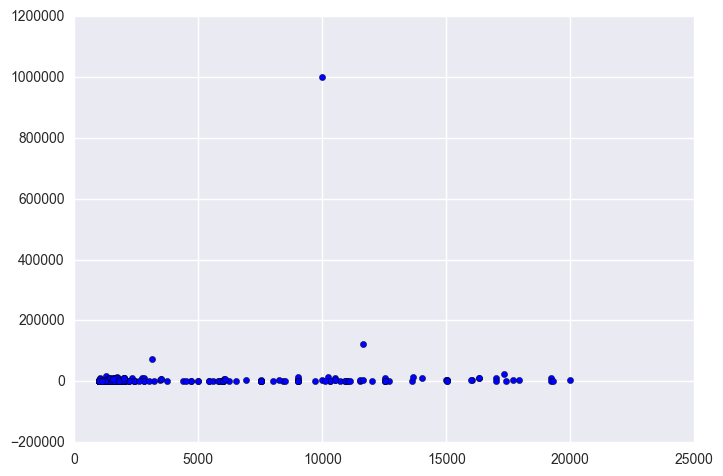

In [11]:
#Noticable outlier on the top
plt.clf()
plt.scatter(work_data['powerPS'],work_data['price'])

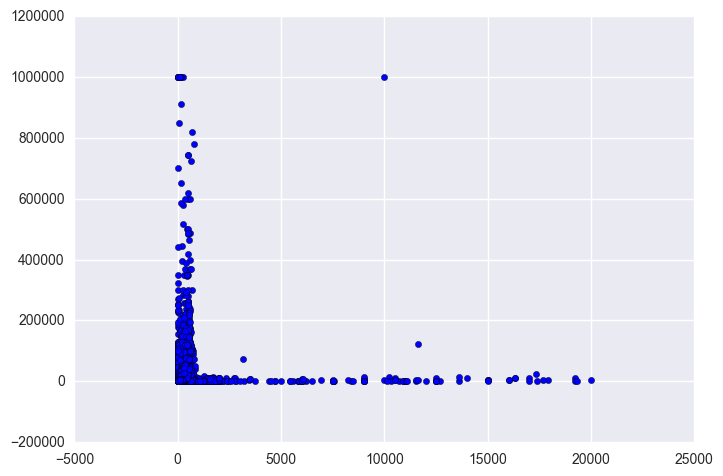

In [12]:
#let's clean-up the mess
autos = autos[(autos.price < 1000000) & (autos.price > 0)]
work_data = autos[(autos.powerPS < 1000000) & (autos.price > 0)]
#many zero price, I will address this later
#no correlation possible, eleminate all the price > 1000000,
#and power.PS > 1000 cases
plt.clf()
plt.scatter(work_data['powerPS'],work_data['price'])

autos = autos[(autos.powerPS < 1000)]

In [13]:
#list(set(autos['model']))
pd.value_counts(autos['model'].values,sort=True)
#pd.unique(autos.model.ravel())

golf                  29056
andere                25669
3er                   19966
polo                  12638
corsa                 12191
astra                 10482
a4                     9991
passat                 9981
c_klasse               8630
5er                    8333
e_klasse               7400
a3                     6503
a6                     5845
focus                  5818
fiesta                 5654
transporter            5383
twingo                 4814
2_reihe                4762
fortwo                 4295
a_klasse               4251
vectra                 4083
1er                    3818
mondeo                 3508
touran                 3496
clio                   3463
3_reihe                3433
punto                  3240
zafira                 2992
megane                 2817
ibiza                  2639
                      ...  
mii                      81
crossfire                66
range_rover_evoque       65
gl                       63
nubira              

In [14]:
print(autos.groupby('model').size())
#multiple instances of passat? Perhaps there are typo erros introducing the models
#this is worthy of more investigation
#autos['model'].unique

#check the number of collumns

model
100              396
145               46
147              563
156              604
159              208
1_reihe         1272
1er             3818
200               17
2_reihe         4762
300c             142
3_reihe         3433
3er            19966
4_reihe          626
500              915
5_reihe          444
5er             8333
601              360
6_reihe         1272
6er              248
7er             1112
80              1516
850              206
90                95
900              115
9000              28
911              941
a1               620
a2               368
a3              6503
a4              9991
               ...  
toledo           321
touareg          731
touran          3496
transit          754
transporter     5383
tt              1313
tucson           238
twingo          4814
up               346
v40              749
v50              252
v60               48
v70              631
v_klasse         162
vectra          4083
verso            311
viano  

In [15]:
##################################
##### Null Values analysis #######
##################################

In [31]:
experiment = autos[['model','gearbox']]
experiment = experiment.dropna()

X_train = experiment['model']          
Y_train = experiment['gearbox']

experiment_data = autos[autos.gearbox.isnull()]
Y_test = experiment_data['model']

experiment_data.head(5)

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
15,2016-03-11 21:39:15,KA_Lufthansa_Edition_450_VB,450,test,kleinwagen,1910,NaN,0,ka,5000,0,benzin,ford,NaN,2016-03-11 00:00:00,24148,2016-03-19 08:46:47
16,2016-04-01 12:46:46,Polo_6n_1_4,300,test,NaN,2016,NaN,60,polo,150000,0,benzin,volkswagen,NaN,2016-04-01 00:00:00,38871,2016-04-01 12:46:46
32,2016-03-15 20:59:01,Golf_3_....._1.4,245,test,limousine,1994,NaN,0,golf,150000,2,benzin,volkswagen,nein,2016-03-15 00:00:00,44145,2016-03-17 18:17:43
37,2016-03-28 17:50:15,Renault_Kangoo_1.9_Diesel,1500,test,NaN,2016,NaN,0,kangoo,150000,1,diesel,renault,nein,2016-03-28 00:00:00,46483,2016-03-30 09:18:02
70,2016-04-01 11:56:40,Opel_astra_g_coupe_1.8_liter_benziner,1200,test,coupe,2001,NaN,0,astra,150000,0,NaN,opel,NaN,2016-04-01 00:00:00,47249,2016-04-07 08:46:07


In [17]:
autos.isnull().sum()

dateCrawled                0
name                       0
price                      0
abtest                     0
vehicleType            34053
yearOfRegistration         0
gearbox                17678
powerPS                    0
model                  18235
kilometer                  0
monthOfRegistration        0
fuelType               29856
brand                      0
notRepairedDamage      66625
dateCreated                0
postalCode                 0
lastSeen                   0
dtype: int64

C:\Users\Marci\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Marci\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


ValueError: Number of features of the model must  match the input. Model n_features is 251 and  input n_features is 234 

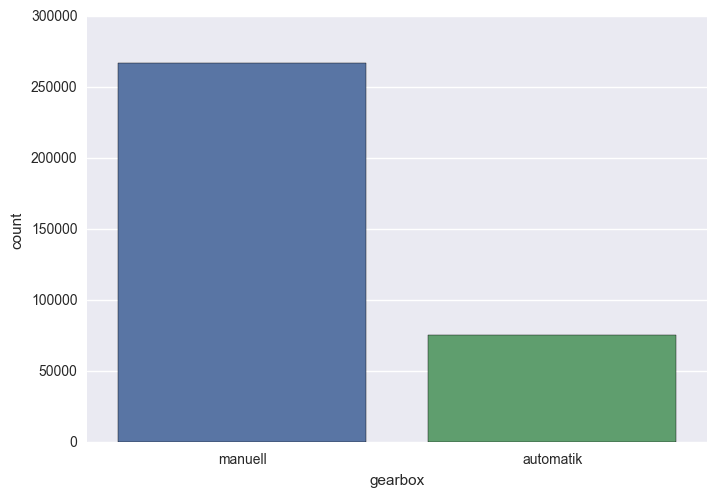

In [26]:
#gearbox
#fisrt check the mode
sns.countplot(autos['gearbox'])
#there is an apparent mode, but it is not dominant enough to just, replace all the missing values by it

#let's apply the rule of thumb
#electric cars have electric gears and vice versa
autos[(autos.gearbox =='automatik')]['fuelType'] = 'elektro'    
autos[(autos.fuelType =='elektro')]['gearbox'] = 'automatik'       
autos.isnull().sum()      

#no gain :(

#are there any Gasoline cars with auto gears???

##################################################################################
#train_null_data = autos
#null_data = autos[autos.'gearbox'.isnull().any(axis=1)]

experiment = autos[['model','gearbox']]
experiment = experiment.dropna()

X_train = experiment['model']          
Y_train = experiment['gearbox']

experiment_data = autos[autos.gearbox.isnull()]
Y_test = experiment_data['model']


X_train = pd.get_dummies(X_train)
Y_train = pd.get_dummies(Y_train)
Y_test = pd.get_dummies(Y_test)


#from sklearn.ensemble import RandomForestClassifier
#rfc = RandomForestClassifier(min_samples_split=5, oob_score=True)
#clf_rfc1 = rfc.fit(X_train, Y_train)
#prediction = clf_rfc1.predict(Y_test)                    



from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
prediction = clf.predict(Y_test)  

In [ ]:
#notRepairedDamage
#from a logic point of view "null" in this field can also mean the abcense of repair
#let's confirm

sns.countplot(autos['notRepairedDamage'])
#Chances look good to our hypothesis
#which variables would be good to have to detect or not the possiblity of a repoair?
#hints: yearOfRegistration,kilometer,powerPS

#Knn imputation

In [ ]:
print(autos['price'].skew())

In [ ]:
#histogram on price
plt.subplots(figsize=(13,9))
sns.kdeplot(autos['price'])
sns.plt.show()

In [ ]:
#let see a boxplot for price
sns.boxplot(autos['price'])
sns.plt.show()

In [ ]:
plt.boxplot(autos.price)

In [ ]:
#Gold! we see that, outliers wil start at 18000, considered price
plt.boxplot(autos.price,showfliers=False)

In [ ]:
sns.boxplot(autos.price.dropna())

In [ ]:
plt.plot(autos['price'])

In [ ]:
#inspecting: price
plt.subplot(3,1,1)
autos['price'].hist(bins=50)
plt.title('Original-Histogram price')
plt.show()
#There are kinda expensive cars on sale. The owners are slightly overestimating the value I guess.

#I'll' cut the price at 100000
work_data = autos[autos.price < 100000]
expensive_autos = autos[autos.price >= 100000]

plt.subplot(3,1,2)
work_data['price'].hist(bins=50)
plt.title('Cut-Histogram price')
plt.show()

print(len(work_data[work_data.price == 0]), 'cars with price 0')
#The other way round some people are giving their car away for free. Unlikly in such high rates. Remove!
#autos = autos[autos.price != 0]
autos = autos[autos.price != 0]
work_data = autos[autos.price < 100000]

plt.subplot(3,1,3)
work_data['price'].hist(bins=50)
plt.title('Final-Histogram price')
plt.show()

In [ ]:
expensive_autos.describe()
print('###################')

In [ ]:
print(expensive_autos.shape)

In [ ]:
#perhaps it is best to create to data sets
#one focusing on standard cars and another for expensive cars

#let's find what's differentiates them (besides the price)...

In [ ]:

#run a regression on the binary target
from sklearn import tree
X = autos[!'pricy_or_not']
Y = autos['pricy_or_not']
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

with open("iris.dot", 'w') as f:
f = tree.export_graphviz(clf, out_file=f)

import os
os.unlink('iris.dot')


import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("iris.pdf") 


from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  


# or a random forest 
RandomForestClassifier(n_estimators=10, 
                       criterion='gini', 
                       max_depth=None, 
                       min_samples_split=2, 
                       min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False, 
                       n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)

In [ ]:
#K-means clustering for analysis
X = autos[!'price']
Y = autos['pre']
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)